## Importing Libraries

In [42]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

import matplotlib.pyplot as plt


## Preprocessing

In [3]:
df_original = pd.read_csv('/content/mushrooms.csv')
df = df_original.copy()
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
# No missing values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [216]:
# divide dataset into X & Y to use different encoding techniques
Y = df['class']
X = df.drop(columns=['class'])
print('X.shape =',X.shape)
print('X.shape =',Y.shape)

X.shape = (8124, 22)
X.shape = (8124,)


In [217]:
#selecting the categ columns
categ_columns = X.select_dtypes(include=['object']).columns
categ_var = X[categ_columns]

#ont hot encoding
enc = OneHotEncoder(handle_unknown='ignore').fit(categ_var)
transformed = enc.fit_transform(X[categ_columns]).toarray()
onehot_df = pd.DataFrame(transformed, columns=enc.get_feature_names())
X = pd.concat([X, onehot_df], axis=1)
X = X.drop(columns=categ_columns)
print(X)

      x0_b  x0_c  x0_f  x0_k  x0_s  x0_x  x1_f  x1_g  x1_s  x1_y  ...  x20_s  \
0      0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0  ...    1.0   
1      0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0  ...    0.0   
2      1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...    0.0   
3      0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0  ...    1.0   
4      0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0  ...    0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
8119   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0  ...    0.0   
8120   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0  ...    0.0   
8121   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...    0.0   
8122   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0  ...    0.0   
8123   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0  ...    0.0   

      x20_v  x20_y  x21_d  x21_g  x21_l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [218]:
le = LabelEncoder()
Y = le.fit_transform(Y)
print(Y)
print('Y.shape =', Y.shape)

[1 0 0 ... 0 1 0]
Y.shape = (8124,)


In [219]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100, stratify = Y)

In [220]:
X_dev, X_test, Y_dev, Y_test = train_test_split(X_test, Y_test, test_size = 0.5, random_state = 100, stratify = Y_test)

### StraifiedSuffleSplit

In [106]:
'''sss = StratifiedShuffleSplit(n_splits=8, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(X.to_numpy(), Y):
       X_train, X_test_1 = X.to_numpy()[train_index], X.to_numpy()[test_index]
       Y_train, Y_test_1 = Y[train_index], Y[test_index]

sssT = StratifiedShuffleSplit(n_splits=8, test_size=0.5, random_state=0)
for a, b in sssT.split(X_test_1, Y_test_1):
       X_test, X_dev = X_test[a], X_test[b]
       Y_test, Y_dev = Y_test[a], Y[b] '''

In [128]:
pd.Series(Y_train).value_counts()

0    3366
1    3133
dtype: int64

In [129]:
data = [X_train, Y_train, X_test, Y_test, X_dev, Y_dev]
for i in range(len(data)):
  if i %2 != 0: 
    data[i] = np.reshape(data[i],(1,data[i].shape[0]))
  else:
    data[i] = data[i].T
  print(data[i].shape)

(117, 6499)
(1, 6499)
(117, 813)
(1, 813)
(117, 812)
(1, 812)


## Build Network

## Initialization

In [221]:
def initialization(dim_array):
    """
    Arguments:
    dim_array -- python array (list) containing the dimensions of each layer in our network and dimension of input layer 1st
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

    L = len(dim_array)            # number of layers in Network
    np.random.seed(3)
    parameters = {}               # Ws and bs 

    for i in range(1,L):
      parameters["W" + str(i)] = np.random.randn(dim_array[i], dim_array[i-1])*np.sqrt(2/dim_array[i-1])  # used Xavier Initialization to prevent exploding and vanishing vectors
      parameters["b" + str(i)] = np.zeros((dim_array[i],1))                                               # used normal distribution for random selection, reduce chance of extreme values to be selected, better for G.D

    return parameters

In [222]:
parameters = initialization([117,8,4,3,1])

## Forward Propagation

In [223]:
## Helper Functions

def sigmoid(Z):

  """
    Arguments:
    Z -- numpy array
    
    Returns:
    A -- output of sigmoid function
    cache -- contains argument Z
  """

  A = 1 / (1 + np.exp(-Z))
  cache = Z
  return A, cache

def relu(Z):

  """
    Arguments:
    Z -- numpy array
    
    Returns:
    A -- output of RELU function
    cache -- contains argument Z
  """
  A = np.maximum(0,Z)
  cache = Z
  return A, cache

In [224]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    Z = np.dot(W,A) + b
    cache = (A, W, b)
    
    return Z, cache

In [225]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    cache = (linear_cache, activation_cache)

    return A, cache

In [226]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- activation value from the output (last) layer
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    # The for loop starts at 1 because layer 0 is the input
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev,
                                             parameters['W' + str(l)],
                                             parameters['b' + str(l)],
                                             activation='relu')
        caches.append(cache)

    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A,
                                          parameters['W' + str(L)],
                                          parameters['b' + str(L)],
                                          activation='sigmoid')
    caches.append(cache)
          
    return AL, caches

In [227]:
AL, caches = L_model_forward(X_train.T,parameters)

In [228]:
pd.Series(AL[0]).describe()

count    6499.000000
mean        0.300240
std         0.098830
min         0.099186
25%         0.221169
50%         0.293642
75%         0.379696
max         0.500000
dtype: float64

## Cost

In [19]:
def cost_function(AL,y):
  """
    Arguments:
    AL -- matrix representing output of final layer (y_hat, estimated)
    y -- matrix representing real output values (y)

    Returns:
    cost -- output of cost function
  """
  m = y.shape[1]
  cost = -1/m*(np.sum(y*np.log(AL)+(1-y)*np.log(1-AL)))
  cost = np.squeeze(cost) # to get 1 value 

  return cost

In [20]:
Y_train_reshaped = np.reshape(Y_train,(1,6499))
cost_function(AL,Y_train_reshaped)


0.6743943096030101

## BACKPRPO


In [244]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ




In [245]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ,A_prev.T)/m  
    db = np.sum(dZ,axis=1,keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)

    return dA_prev, dW, db

In [246]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ =relu_backward(dA, activation_cache) 
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

        
    elif activation == "sigmoid":
        dZ =sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [247]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, activation='sigmoid')
    grads["dA" + str(L-1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp

    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation='relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

## UPDATE

In [25]:
def update_parameters(parameters,grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    params -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """

    L = len(parameters) // 2 # get number of layers

    for l in range(L): # in each layer update w and b 
          parameters["W" + str(l+1)] =parameters["W" + str(l+1)]- (learning_rate * grads["dW" + str(l+1)])
          parameters["b" + str(l+1)] =parameters["b" + str(l+1)]-(learning_rate * grads["db" + str(l+1)])

    return parameters 

## Model

In [26]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialization(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = cost_function(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)    

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [ ]:
parameters, costs = L_layer_model(X_train.T, Y_train_reshaped, [117,8,4,3,1], learning_rate = 0.0075, num_iterations = 6000, print_cost=True)

Cost after iteration 0: 0.6808133540323417
Cost after iteration 100: 0.5272714851238325
Cost after iteration 200: 0.4615523242883134
Cost after iteration 300: 0.40816860507127595
Cost after iteration 400: 0.3611151275053081
Cost after iteration 500: 0.3210224355480243
Cost after iteration 600: 0.2876882497490378
Cost after iteration 700: 0.2600199585369114
Cost after iteration 800: 0.2370382279913729
Cost after iteration 900: 0.2175668345235836
Cost after iteration 1000: 0.20078232092756992
Cost after iteration 1100: 0.18621922714974815
Cost after iteration 1200: 0.17347343368491752
Cost after iteration 1300: 0.16229522998958357
Cost after iteration 1400: 0.15241425859938568
Cost after iteration 1500: 0.14363215542739802
Cost after iteration 1600: 0.1357633954788699
Cost after iteration 1700: 0.1286695385171883
Cost after iteration 1800: 0.12224788077270582
Cost after iteration 1900: 0.1164379547857925
Cost after iteration 2000: 0.11116328700504839
Cost after iteration 2100: 0.10633764

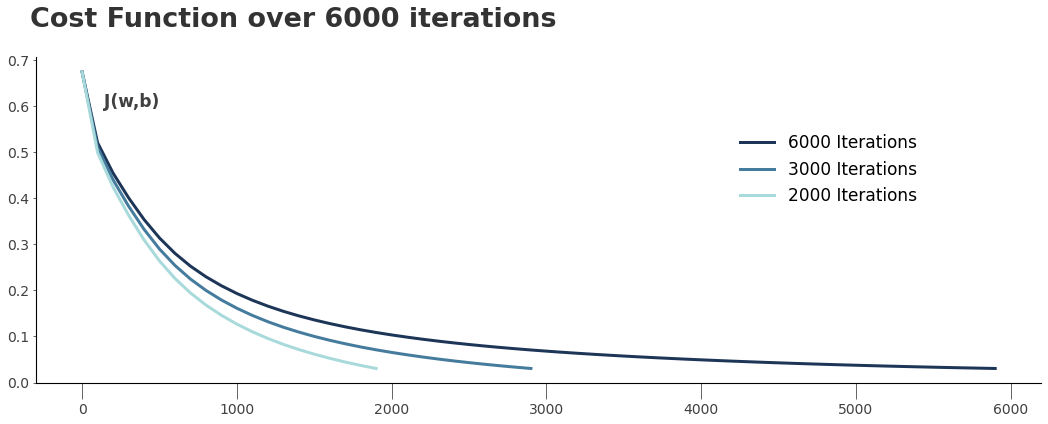

In [206]:
# setup plot size
fig, ax1 = plt.subplots(figsize=(18,6))
fig.patch.set_facecolor('xkcd:white')
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# DATA
# draw the line curve of TMAX
ax1.plot(np.arange(0,6000,100),costs, '-', color='#1d3557', lw=3)
ax2.plot(np.arange(0,3000,100),costs[:-30], '-', color='#457b9d', lw=3)
ax3.plot(np.arange(0,2000,100),costs[:-40], '-', color='#a8dadc', lw=3)

# ASTHETICS
# Remove splines. Can be done one at a time or can slice with a list.
for spine in ['top', 'right']:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)
    ax3.spines[spine].set_visible(False)

ax1.spines['bottom'].set_linewidth(1.1)
ax1.spines['bottom'].set_capstyle('projecting')
ax1.spines['left'].set_linewidth(1.1)
ax1.spines['left'].set_capstyle('projecting')


# Reformat y-axis tick labels
ax1.tick_params(axis='y', labelsize=14, colors='#404040')
ax1.tick_params(axis='x', labelsize=14, size= 16, colors='#404040')
ax2.tick_params(right = False)
ax3.tick_params(right = False)

ax2.set_yticklabels(' ')
ax3.set_yticklabels(' ')

# ANNOTATION
# Label
ax1.text(x=500, y=0.6, s='J(w,b)',ha='right',color='#404040',fontsize=17, fontweight='heavy')
ax1.text(x=0.12, y=.95, s="Cost Function over 6000 iterations", transform=fig.transFigure, ha='left', fontsize=27, weight='bold', alpha=.8)

fig.legend(['6000 Iterations','3000 Iterations','2000 Iterations'],loc=(0.7,0.5),fontsize=17,frameon=False)

fig.show()

## Predict

In [144]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m) X_dev or X_test
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = L_model_forward(X, parameters)
    predictions = np.round(A2)
    
    return predictions

In [145]:
def calculate_accuracy(Y,Y_hat):
  accuracy = float((np.dot(Y,Y_hat.T) + np.dot(1 - Y, 1 - Y_hat.T)) / float(Y.size)*100)
  return accuracy

In [146]:
AL_train = predict(parameters, X_train.T)
calculate_accuracy(Y_train_reshaped,AL_train)

99.69226034774582

In [147]:
Y_dev_reshaped = np.reshape(Y_dev,(1,Y_dev.shape[0]))
AL_dev = predict(parameters, X_dev.T)
calculate_accuracy(Y_dev_reshaped,AL_dev)

99.50738916256158

In [148]:
Y_test_reshaped = np.reshape(Y_test,(1,Y_test.shape[0]))
AL_test = predict(parameters, X_test.T)
calculate_accuracy(Y_test_reshaped,AL_test)

99.63099630996311

**Expected Output**:

<table>
    <tr>
    <td>
        <b>Train Accuracy</b>
    </td>
    <td>
    99.81
    </td>
    </tr>
    <tr>
    <td>
        <b>Dev Accuracy</b>
    </td>
    <td>
    99.63
    </td>
    </tr>
    <tr>
    <td>
        <b>Test Accuracy</b>
    </td>
    <td>
    99.75
    </td>
    </tr>
</table>

# Regularization L2

In [241]:
def cost_function_L2(AL,y,parameters,alpha):
  """
    Arguments:
    AL -- matrix representing output of final layer (y_hat, estimated)
    y -- matrix representing real output values (y)
    lambd -- int represnting regularization parameter 

    Returns:
    cost -- output of cost function
  """
  m = y.shape[1]
  cross_entropy_cost = cost_function(AL,y)

  #regularized weight
  norms=[]
  L = len(parameters.keys())//2
  for l in range(1,L):
    norm = np.linalg.norm(parameters['W'+str(l)])**2
    norms.append(norm)

  L2_regularization_cost = (1/m)*(alpha/2) * sum(norms)
  cost = cross_entropy_cost + L2_regularization_cost

  cost = np.squeeze(cost) # to get 1 value 

  return cost

In [242]:
cost_function_L2(AL,Y_train_reshaped,parameters,alpha=3)

0.6808133540323417

In [274]:
def update_parameters_L2(parameters,grads,m,learning_rate, alpha):
    """
    Update parameters using gradient descent
    
    Arguments:
    params -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """

    L = len(parameters) // 2 # get number of layers
    weight_decay = 1- ((alpha*learning_rate)/m)
    for l in range(L): # in each layer update w and b 
          parameters["W" + str(l+1)] =weight_decay*(parameters["W" + str(l+1)])- (learning_rate * grads["dW" + str(l+1)])
          parameters["b" + str(l+1)] =weight_decay*(parameters["b" + str(l+1)])-(learning_rate * grads["db" + str(l+1)])

    return parameters 

In [275]:
# GRADED FUNCTION: L_layer_model

def L_layer_model_L2(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000,alpha=3, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    m = Y.shape[1]
    # Parameters initialization.
    parameters = initialization(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = cost_function_L2(AL,Y_train_reshaped,parameters,alpha)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)    

        # Update parameters.
        parameters = update_parameters_L2(parameters,grads,m,learning_rate, alpha)

        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [315]:
parameters, costs = L_layer_model_L2(X_train.T, Y_train_reshaped, [117,8,4,3,1], learning_rate = 0.0075, num_iterations = 500,alpha=0, print_cost=True)

Cost after iteration 0: 0.6743943096030101
Cost after iteration 100: 0.5207215753833273
Cost after iteration 200: 0.45484010707503647
Cost after iteration 300: 0.40129964077413605
Cost after iteration 400: 0.3541069763427029
Cost after iteration 499: 0.3142767199538195


In [316]:
parameters['b1']

array([[-6.29005304e-05],
       [ 3.73572443e-02],
       [-1.21869050e-02],
       [ 1.34295990e-02],
       [ 6.16254171e-02],
       [-2.44836216e-03],
       [ 6.12059878e-03],
       [-1.79589478e-03]])

In [317]:
AL_train = predict(parameters, X_train.T)
calculate_accuracy(Y_train_reshaped,AL_train)

95.18387444222188

In [318]:
Y_dev_reshaped = np.reshape(Y_dev,(1,Y_dev.shape[0]))
AL_dev = predict(parameters, X_dev.T)
calculate_accuracy(Y_dev_reshaped,AL_dev)

95.44334975369459

In [319]:
Y_test_reshaped = np.reshape(Y_test,(1,Y_test.shape[0]))
AL_test = predict(parameters, X_test.T)
calculate_accuracy(Y_test_reshaped,AL_test)

94.4649446494465